In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from intraseismic.utils import *
from pylops.avo import PoststackLinearModelling
from pylops.utils.wavelets import ricker
from scipy.signal import filtfilt
set_seed(42)

/home/romerojd/anaconda3/envs/tiny/lib/python3.9/site-packages/cupy/_environment.py:437: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda113

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


True

In [7]:
# Limits 
xmin, xmax = 200, 500
ymin, ymax = 900, 1100
zmin, zmax = 500, 800

# Model loading
vp = np.fromfile('../../data/Vp', dtype='<f').reshape(1501, 2001, 1751)[zmin:zmax, ymin:ymax, xmin:xmax]
den = 2.  # Density model [g/cc]
m = np.log(vp * den) # Log impedance
nz, ny, nx = m.shape
vmin, vmax = np.percentile(np.exp(m), [2, 98])

# Background model
nsmoothz, nsmoothx, nsmoothy = 60, 60, 60
mback = filtfilt(np.ones(nsmoothz) / float(nsmoothz), 1, m, axis=0)
mback = filtfilt(np.ones(nsmoothx) / float(nsmoothx), 1, mback, axis=1)
mback = filtfilt(np.ones(nsmoothy) / float(nsmoothy), 1, mback, axis=2)

# Wavelet
nt0 = 301
dt0 = 0.004
t0 = np.arange(nt0) * dt0
ntwav = 61
wav, twav, wavc = ricker(t0[: ntwav // 2 + 1], 15)

# Forward modelling data
G = PoststackLinearModelling(wav/2, nt0=nz, spatdims=(ny, nx))
d = G(m)

# Adding colored noise
sigman = 2e-1 # Change noise here
n = filtfilt(np.ones(4)/4, 1,
             filtfilt(np.ones(5)/5, 1,
             filtfilt(np.ones(5)/5, 1, np.random.normal(0, sigman, (nz, ny, nx)), axis=0, method='gust'),
             axis=1, method='gust'), axis=2, method='gust')
dn = d + n

(<Figure size 700x700 with 4 Axes>,
 (<AxesSubplot:xlabel='x samples', ylabel='t samples'>,
  <AxesSubplot:ylabel='y samples'>,
  <AxesSubplot:xlabel='y samples'>))

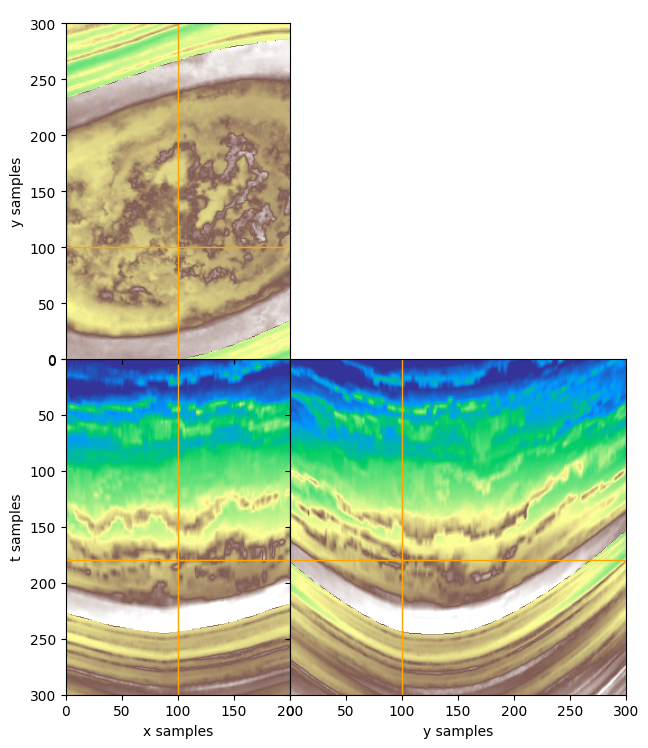

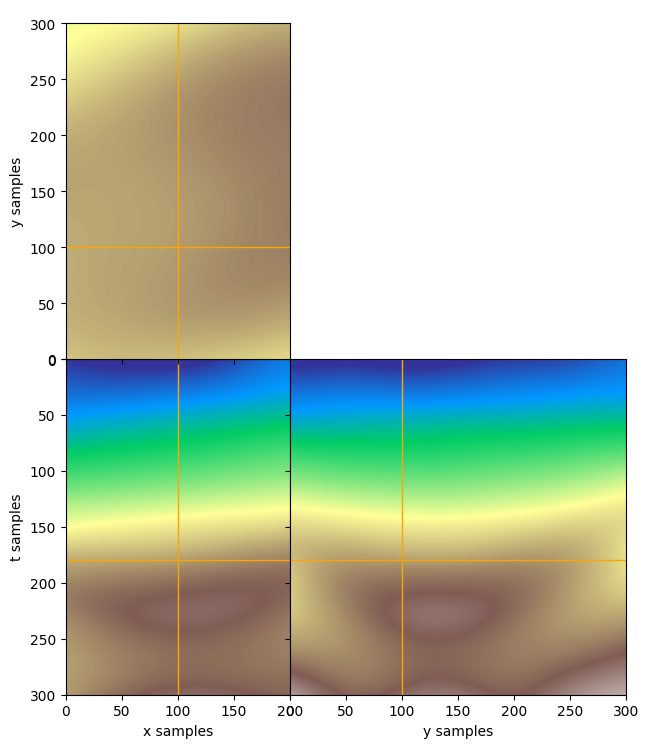

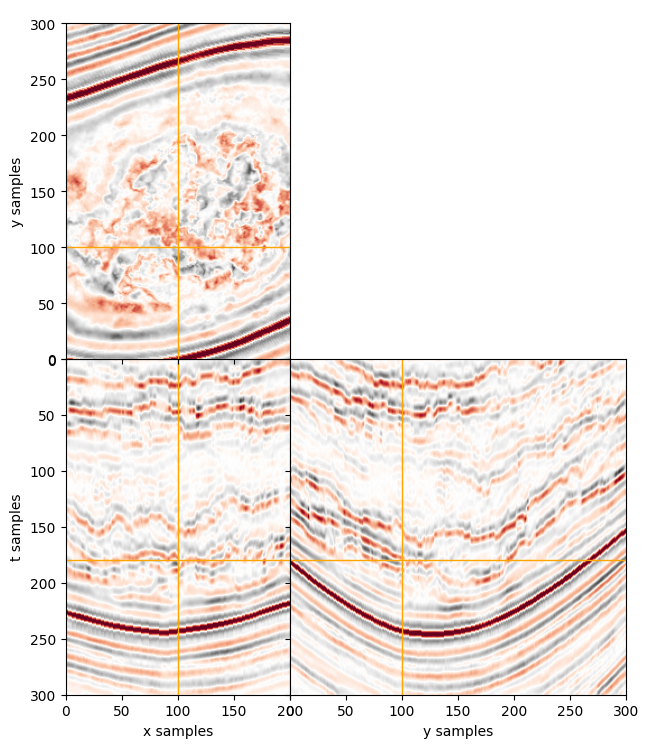

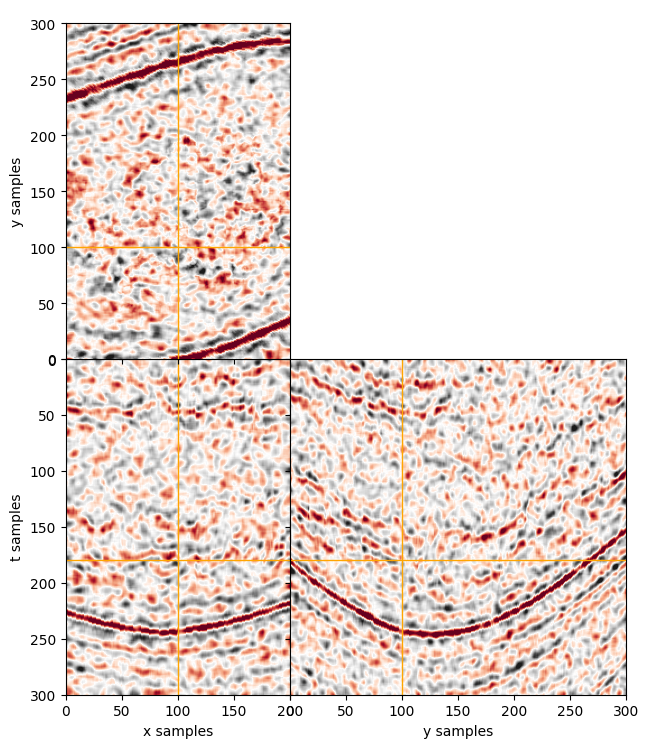

In [8]:
i, j, k = 180, 100, 100
explode_volume(np.exp(m), i, j, k, figsize=(7, 7), cmap='terrain', vmin=vmin, vmax=vmax, ratio=((2,3),(1,1)),
               whspace=(0., -0.08))
explode_volume(np.exp(mback), i, j, k, figsize=(7, 7), cmap='terrain', vmin=vmin, vmax=vmax, ratio=((2,3),(1,1)),
               whspace=(0., -0.08))
explode_volume(d, i, j, k, figsize=(7, 7),  vmin=-0.05, vmax=0.05, cmap='RdGy', ratio=((2,3),(1,1)),
               whspace=(0., -0.08))
explode_volume(dn, i, j, k, figsize=(7, 7),  vmin=-0.05, vmax=0.05, cmap='RdGy', ratio=((2,3),(1,1)),
               whspace=(0., -0.08))


In [9]:
# np.save('../../data/SEAM_mback', mback)
# np.save('../../data/SEAM_mtrue', m)
# np.save('../../data/SEAM_data_noise0', d)
# np.save('../../data/SEAM_data_noise01', dn)
# np.save('../../data/SEAM_data_noise02', dn)
# np.save('../../data/SEAM_wav_ricker15', wav)

In [3]:
# mtrue = np.load('../../data/SEAM_mtrue.npy')
# mback = np.load('../../data/SEAM_mback.npy')
# d = np.load('../../data/SEAM_data_noise0.npy')
# dn1 = np.load('../../data/SEAM_data_noise01.npy')
# dn2 = np.load('../../data/SEAM_data_noise02.npy')
# wav = np.load('../../data/SEAM_wav_ricker15.npy')
# np.savez('../../data/SEAM', m_true=mtrue, mback=mback, wav=wav, d=d, dn1=dn1, dn2=dn2)